## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [3]:
# answer goes here
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"
nba = pd.read_csv(url)
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<IPython.core.display.Javascript object>

The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [4]:
# answer goes here
nba = nba[nba["GS"] >= 20]
nba = nba[nba["MP"] >= 10]
nba_og = nba.copy()

<IPython.core.display.Javascript object>

Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [5]:
# answer goes here
cols = ["PTS", "TRB", "AST", "STL", "BLK", "TOV"]
nba = nba[cols]
nba.head()

,PTS,TRB,AST,STL,BLK,TOV
3,13.9,9.5,1.6,1.5,1.0,1.7
4,8.9,7.3,2.2,0.9,0.8,1.5
7,21.3,9.2,2.4,0.5,1.3,1.8
10,10.9,8.4,1.4,0.5,1.5,1.3
12,9.4,7.5,1.3,0.8,0.4,0.9


<IPython.core.display.Javascript object>

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [6]:
# answer goes here
scaler = StandardScaler()
nba_scaled = scaler.fit_transform(nba)

nba_scaled = pd.DataFrame(nba_scaled, columns=nba.columns, index=nba.index)
nba_scaled.head()

,PTS,TRB,AST,STL,BLK,TOV
3,0.114638,1.612909,-0.617816,1.393220,0.824001,0.023511
4,-0.744985,0.768627,-0.330886,-0.050271,0.420162,-0.218831
7,1.386880,1.497780,-0.235242,-1.012598,1.429758,0.144681
10,-0.401136,1.190768,-0.713459,-1.012598,1.833596,-0.461172
12,-0.659023,0.845380,-0.761281,-0.290853,-0.387514,-0.945854


<IPython.core.display.Javascript object>

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [ ]:
# Post analysis results:
#
# * Cluster 0 (n=179): 
#     * big man players, lots of rebounds and blocks
#     * dominated by the center position
# * Cluster 1 (n=179):
#     * smaller, good players. high pts, ast, stl, and tov
#     * dominated by the point guard position
# * Cluster 2 (n=446):
#     * meh players, prolly low minutes
#     * position-wise, seems to be a catch-all for 'not star C or PG'

In [7]:
# answer goes here
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(nba_scaled)

KMeans(n_clusters=3, random_state=42)

<IPython.core.display.Javascript object>

In [15]:
pd.Series(kmeans.labels_).value_counts()

2    446
1    179
0    179
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# Cluster 0: big man players, lots of rebounds and blocks
# Cluster 1: smaller, good players. high pts, ast, stl, and tov
# Cluster 2: meh players, prolly low minutes
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids, columns=nba.columns)
centroids_df.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV
0,13.763128,8.625698,1.920670,0.775978,1.235196,1.675419
1,19.491620,5.293855,5.934078,1.354190,0.486034,2.797765
2,10.508744,3.962556,2.060762,0.805157,0.376233,1.234305


<IPython.core.display.Javascript object>

Pos,C,PF,PF-C,PF-SF,PG,SF,SF-SG,SG
label,,,,,,,,
0,122,51,0,0,1,5,0,0
1,6,13,0,0,94,27,1,38
2,38,91,1,2,64,114,1,135


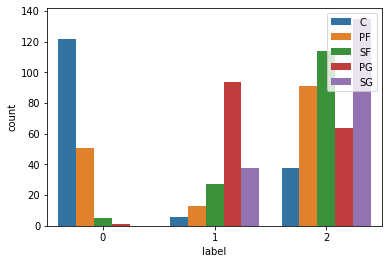

<IPython.core.display.Javascript object>

In [12]:
# Cluster 0: dominated by the center position
# Cluster 1: dominated by the point guard position
# Cluster 2: position-wise, seems to be a catch-all for 'not star C or PG'
nba_og["label"] = kmeans.labels_
pos_label_ct = pd.crosstab(nba_og["label"], nba_og["Pos"])
display(pos_label_ct.style.background_gradient(axis=1))

# dropping hyphenated positions from the plot as they're such small contributors
sns.countplot("label", hue="Pos", data=nba_og[~nba_og["Pos"].str.contains("-")])
plt.legend(loc="upper right")
plt.show()